In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans

In [4]:
# Showing the first few rows to help visualize the data I am working on
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.shape

(150, 6)

In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

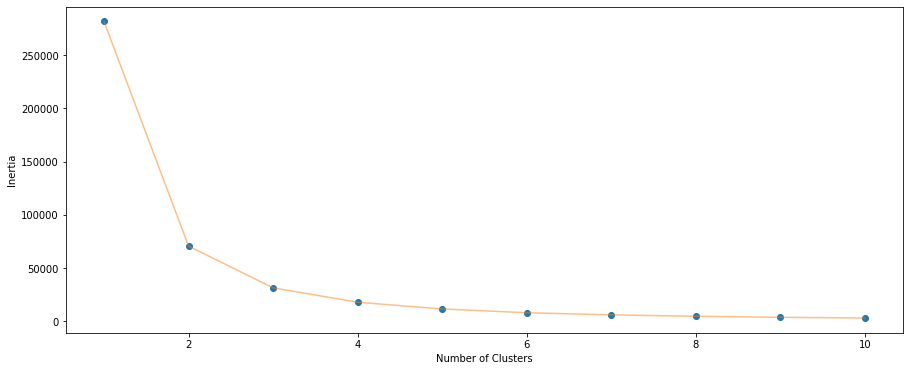

In [10]:
# First we will need to find the optimal number of clusters to use. To do this, we will use what we call inertia.
# Inertia measures how well a dataset was clustered by K-Means. We can read the best value by looking at the "elbow"
# of the inertia-clusters graph which is 3 clusters in this case.

X1 = data.iloc[:, [0,1,2,3]].values
inertia = []
for n in range(1 , 11):
    model = KMeans(n_clusters = n,
               init='k-means++',
               max_iter=500,
               random_state=42)
    model.fit(X1)
    inertia.append(model.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

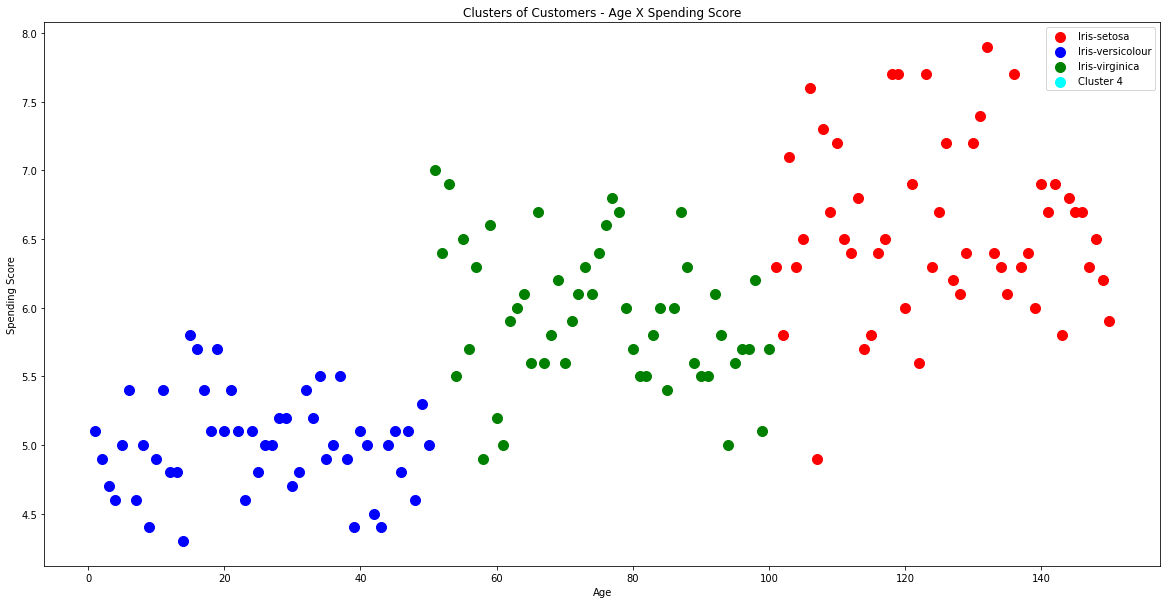

In [19]:
# After I found that the number of Clusters that works best from the above cell is 3, I now need to do the K-Means clustering using
# 3 clusters. We generally do this by: 
# 1- Randomly place K centroids for the initial clusters.
# 2- Assign each data point to their nearest centroid.
# 3- Update centroid locations based on the locations of the data points.
# Repeat Steps 2 and 3 until points don’t move between clusters and centroids stabilize.

model = KMeans(n_clusters = 3,
            init='k-means++',
            max_iter=500,
            random_state=42)
model.fit(X1)
labels = model.labels_
centroids = model.cluster_centers_
y_kmeans = model.fit_predict(X1) 

plt.figure(figsize=(20,10))
plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X1[y_kmeans == 2, 0], X1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(X1[y_kmeans == 3, 0], X1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') # extra step for any additional data
plt.title('Clusters of Customers - Age X Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()